In [5]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] =16

from matplotlib import animation
from IPython.display import HTML

In [12]:
nx =201
dx =0.2
dt =0.01
x = numpy.linspace(-10,10,nx)
alpha = 1
D=1
uo = numpy.zeros(nx)
lbound = numpy.where(x >= -2)
ubound = numpy.where(x <= 2)            
bounds = numpy.intersect1d(lbound, ubound)
uo[bounds]=0.01                 #Initial waveform

In [10]:
def CatchtheFisherwave(u,nt,dt,dx):
    
    """Solve the linear convection equation.
    
    Solves the equation d_t u + c d_x u = 0 where 
    * the diffusion constant is set to 1
    * the domain is x \in [0, 10]
    * 20 timesteps are taken, with \Delta t = 0.1
    * the initial data is described in above
    
    Parameters
    ----------
    u  : Initial waveform
    nx : integer
        number of internal grid points
    dt : difference in each timestep
    dx :
        
    Returns
    -------
    
    
    """
    
    un= numpy.zeros_like(u)
    for n in range (nt):
        un= numpy.copy(u)
        u[1:-1] = un[1:-1] \
                + D * dt/dx**2 * (un[2:] - 2*un[1:-1] + un[0:-2]) \
                + alpha * un[1:-1] * dt * (1 - un[1:-1])
                
        u[0] = u[1] 
        u[-1] = u[-2] 
        
        
    return u

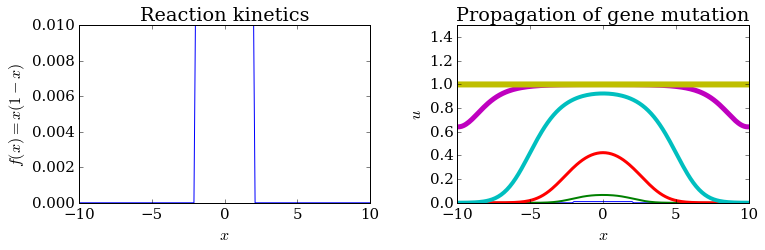

In [11]:
nt = [0,200,250,300,500,800]#1000,1250,1500]
% run subplot.py
sub1.plot(x,uo)
for n in nt:
    u = CatchtheFisherwave(uo,n,dt,dx)
    sub2.plot(x,u,lw=nt.index(n)+1)
pyplot.show()

In [5]:
%%capture
%run Animate_mutantgene.py

In [6]:
HTML(anim.to_html5_video())

In [7]:
numpy.allclose(u_final,numpy.ones(nx),1e-3)

NameError: name 'u_final' is not defined